# Index

- Tools
- Data
- How many people total were committed, discharged, and are still awaiting discharge?
    - ```399, 249, 150```
- Mean and median wait times for those discharged
    - ```14.7``` years
- Commits over time
    - Peaks between ```1982-1994``` ish, clear spike in ```'85```
- Discharges over time
    - ```First discharge only in 1986. Couple of spikes — most noticeably in 2008 – but no clear trend.```
- Net intake over time
    - ```Net intake (People newly committed - people discharged) drops to 0 or negative in 2000s,``` with small exceptions in 2012, 2013 and 2017
- People who have not been discharged
   - ```Most are relatively recently committed people, but earliest case dates from 1976```
- Total people under board's jurisdiction at any given point in time 
   - ```Median number of people committed at any given point in time is about 151```
- Same name folks 
    - ```These look like errors in data entry on their end```

# Tools

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data

In [4]:
df = pd.read_csv('Acquittee_Listing.xlsx - All.csv')

In [5]:
df.dtypes

LastName         object
FirstName        object
CommitDate       object
DischargeDate    object
dtype: object

In [6]:
df['CommitDate'] = pd.to_datetime(df['CommitDate'])

In [7]:
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])

In [8]:
df['Difference'] = df['DischargeDate'] - df['CommitDate'] 

Can we get demographic information?

# How many people total were committed, discharged and are still awaiting discharge?

Total committed:

In [9]:
len(df)

399

Total discharged:

In [10]:
len(df[df['DischargeDate'].isna()==False])

249

People still awaiting discharge:

In [11]:
len(df[df['DischargeDate'].isna()])

150

# Means and medians

For people who are discharged, what's the average wait?

In [12]:
#mean

In [13]:
df['Difference'].mean()

Timedelta('5360 days 23:42:39.036144576')

In [14]:
#median

In [15]:
df['Difference'].median()

Timedelta('5356 days 00:00:00')

In [16]:
#nearly 15 years!!

In [17]:
5356/365

14.673972602739726

People on the higher end of this spectrum:

In [18]:
df.sort_values(by='Difference', ascending=False).head(60)

LastName FirstName CommitDate DischargeDate Difference
326           Russ    Norman 1978-02-16    2020-06-19 15464 days
376         Warren   William 1974-05-28    2013-12-17 14448 days
286       Paquette   William 1980-03-11    2019-08-21 14407 days
289          Payne     James 1980-04-17    2015-11-01 12981 days
148        Herlihy    Robert 1977-05-04    2011-01-04 12298 days
62          Cohane      John 1986-08-21    2020-04-20 12296 days
234     McCullough   Charles 1976-01-22    2009-06-06 12189 days
358     St. Pierre   Charles 1978-07-20    2010-12-06 11827 days
359        Stanton   Randall 1989-02-15    2020-06-14 11442 days
210           Long    Calvin 1986-10-16    2018-01-26 11425 days
263           Neal     David 1982-01-25    2012-10-18 11224 days
137     Harrington      Mark 1982-09-02    2012-11-10 11027 days
138         Harris     Leroy 1983-12-05    2014-01-31 11015 days
165       Johnston   William 1983-03-24    2013-03-23 10957 days
124       Giordano     Bryan 1986-04-14    2016-04-07 10951 days
125         Golden  !Jeffrey 1989-04-20    2017-12-10 10461 days
370       Von Deck      Jack 1982-06-01    2011-01-10 10450 days
102        Estrada   Dorothy 1990-12-12    2018-12-13 10228 days
325        Ruggles   Kenneth 1987-10-23    2015-10-22 10226 days
144        Henault  Roderick 1979-03-26    2007-03-10 10211 days
53       Champagne     Gregg 1988-04-18    2016-02-19 10168 days
284      Pallotolo    Thomas 1985-04-24    2011-12-03  9719 days
28         Bianchi   Richard 1991-11-15    2018-03-28  9630 days
42          Bryant    Curtis 1993-09-07    2019-12-15  9595 days
190  LaPointe,Jr.     Edward 1978-06-27    2004-06-28  9498 days
116        Gardner  Lawrence 1990-08-21    2016-08-03  9479 days
150        Hofmann     Peter 1989-10-23    2015-07-22  9403 days
312           Rich   William 1991-07-25    2016-07-24  9131 days
161        Jimenez    Samuel 1976-11-04    2001-11-03  9130 days
171           Keen    Marvin 1993-05-11    2018-05-10  9130 days
163        Johnson   Raymond 1985-03-18    2010-03-17  9130 days
58           Clark     Carol 1978-02-16    2003-02-10  9125 days
195         Layden    Thomas 1978-01-26    2003-01-20  9125 days
373         Walton    Gerald 1978-09-14    2003-08-13  9099 days
82       Del Santo  Alphonso 1988-06-22    2013-05-14  9092 days
110       Franklin      John 1978-04-27    2003-02-13  9058 days
92         Drummer    Gloria 1988-12-06    2013-06-06  8948 days
68           Conti    Joseph 1991-12-03    2016-04-06  8891 days
388         Wilson   Timothy 1981-06-11    2005-09-23  8870 days
295       Pellerin     Louis 1994-11-14    2019-01-13  8826 days
282       Pagliari      John 1982-01-28    2005-11-11  8688 days
76           Crowe   William 1978-01-12    2001-02-15  8435 days
225       Maskiell     Edwin 1986-01-21    2008-10-07  8295 days
243         Mercer     Laden 1986-03-20    2008-09-19  8219 days
327        Salzman      Alan 1979-04-18    2001-07-17  8126 days
303      Poznanski     Kevin 1987-09-23    2009-10-15  8058 days
322          Rossi     Roger 1987-10-07    2009-10-14  8043 days
179       Knighton    Johnny 1982-01-14    2004-01-14  8035 days
7     Andrychowski    Steven 1985-04-10    2007-04-06  8031 days
131      Griffiths   Clifton 1986-03-21    2008-01-23  7978 days
220          Mahon     Brian 1990-06-29    2012-04-11  7957 days
323     Roszkowski     Frank 1981-03-12    2002-12-18  7951 days
348          Smith    Joseph 1987-01-23    2008-07-23  7852 days
95          Duncan   Bertram 1975-05-29    1996-09-20  7785 days
149          Hodge    Hilary 1994-07-25    2015-11-10  7778 days
363           Todd   Michael 1991-03-14    2012-06-10  7759 days
86       Dickinson    Martin 1985-06-04    2006-08-11  7738 days
133         Hadden      Mark 1997-06-10    2018-05-27  7656 days
383          Wells   Raymond 1974-05-30    1995-05-07  7647 days
357       St. John    Ronald 1988-11-04    2009-10-01  7636 days

# Commits over time

<Figure size 1440x720 with 0 Axes>

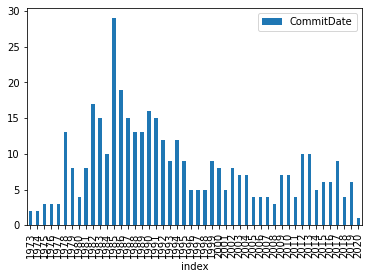

In [19]:
plt.figure(figsize=(20, 10))
df['CommitDate'].dt.year.value_counts().reset_index().sort_values(by='index').plot(x='index', y='CommitDate',kind='bar')
# plt.xticks(rotation=15)
plt.show()

# Discharges over time

How many people got discharged each year?

In [20]:
#first instances in 1986

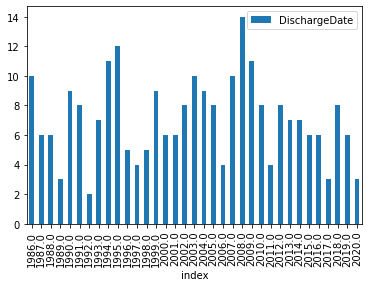

In [21]:
ax = df['DischargeDate'].dt.year.value_counts().reset_index().sort_values(by='index').plot(x='index', y='DischargeDate',kind='bar')
#ax.set_ylim(ymin=1973)

# Net intake over time

Does the PSRB commit as many people as it discharges each year? Or does it discharge more people than it brings in?

In [37]:
df_final

year  commits  discharges  net_intake  Cumulative_sum  \
0   1973        2         0.0         2.0             2.0   
1   1974        2         0.0         2.0             4.0   
2   1975        3         0.0         3.0             7.0   
3   1976        3         0.0         3.0            10.0   
4   1977        3         0.0         3.0            13.0   
5   1978       13         0.0        13.0            26.0   
6   1979        8         0.0         8.0            34.0   
7   1980        4         0.0         4.0            38.0   
8   1981        8         0.0         8.0            46.0   
9   1982       17         0.0        17.0            63.0   
10  1983       15         0.0        15.0            78.0   
11  1984       10         0.0        10.0            88.0   
12  1985       29         0.0        29.0           117.0   
13  1986       19        10.0         9.0           136.0   
14  1987       15         6.0         9.0           151.0   
15  1988       13         6.0         7.0           164.0   
16  1989       13         3.0        10.0           177.0   
17  1990       16         9.0         7.0           193.0   
18  1991       15         8.0         7.0           208.0   
19  1992       12         2.0        10.0           220.0   
20  1993        9         7.0         2.0           229.0   
21  1994       12        11.0         1.0           241.0   
22  1995        9        12.0        -3.0           250.0   
23  1996        5         5.0         0.0           255.0   
24  1997        5         4.0         1.0           260.0   
25  1998        5         5.0         0.0           265.0   
26  1999        9         9.0         0.0           274.0   
27  2000        8         6.0         2.0           282.0   
28  2001        5         6.0        -1.0           287.0   
29  2002        8         8.0         0.0           295.0   
30  2003        7        10.0        -3.0           302.0   
31  2004        7         9.0        -2.0           309.0   
32  2005        4         8.0        -4.0           313.0   
33  2006        4         4.0         0.0           317.0   
34  2007        4        10.0        -6.0           321.0   
35  2008        3        14.0       -11.0           324.0   
36  2009        7        11.0        -4.0           331.0   
37  2010        7         8.0        -1.0           338.0   
38  2011        4         4.0         0.0           342.0   
39  2012       10         8.0         2.0           352.0   
40  2013       10         7.0         3.0           362.0   
41  2014        5         7.0        -2.0           367.0   
42  2015        6         6.0         0.0           373.0   
43  2016        6         6.0         0.0           379.0   
44  2017        9         3.0         6.0           388.0   
45  2018        4         8.0        -4.0           392.0   
46  2019        6         6.0         0.0           398.0   
47  2020        1         3.0        -2.0           399.0   

    Cumulative_sum_discharges  Population?  
0                         0.0          2.0  
1                         0.0          4.0  
2                         0.0          7.0  
3                         0.0         10.0  
4                         0.0         13.0  
5                         0.0         26.0  
6                         0.0         34.0  
7                         0.0         38.0  
8                         0.0         46.0  
9                         0.0         63.0  
10                        0.0         78.0  
11                        0.0         88.0  
12                        0.0        117.0  
13                       10.0        126.0  
14                       16.0        135.0  
15                       22.0        142.0  
16                       25.0        152.0  
17                       34.0        159.0  
18                       42.0        166.0  
19                       44.0        176.0  
20                       51.0        178.0  
21                      

<AxesSubplot:xlabel='year'>

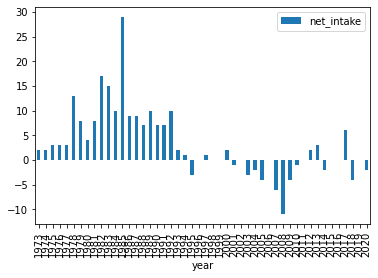

In [36]:
df_final.plot(x='year', y='net_intake', kind='bar')

# People who have not been discharged

When were they committed?

<AxesSubplot:xlabel='index'>

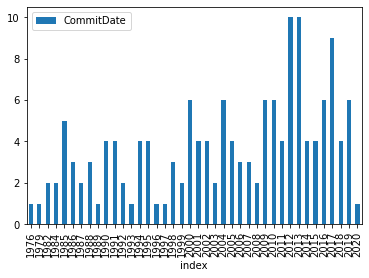

In [22]:
df[df['DischargeDate'].isna()]['CommitDate'].dt.year.value_counts().reset_index().sort_values(by='index').plot(x='index', y='CommitDate',kind='bar')

Who are they?

In [23]:
df[df['DischargeDate'].isna()].sort_values('CommitDate', ascending=True)

LastName FirstName CommitDate DischargeDate Difference
288      Pascale    Donald 1976-09-16           NaT        NaT
123    Gillespie   Gregory 1979-01-25           NaT        NaT
197         Leak  Benjamin 1982-01-25           NaT        NaT
270        Oates   Timothy 1982-05-13           NaT        NaT
381       Webber   William 1984-08-27           NaT        NaT
..           ...       ...        ...           ...        ...
206      Lindsay    Isaiah 2019-02-22           NaT        NaT
118      Garvins   Diamond 2019-05-14           NaT        NaT
41         Brown     Imani 2019-10-21           NaT        NaT
377      Wascher      Jake 2019-12-23           NaT        NaT
169  Karolkowski   Michael 2020-01-06           NaT        NaT

[150 rows x 5 columns]

# Total Population over time

We know that 150 people are currently under the jurisdiction of the PSRB. But is this number typical? How many people were under the board's jurisdiction at any given point in time?

In [24]:
df_commits = df['CommitDate'].dt.year.value_counts().reset_index().sort_values(by='index').rename(columns={
     'index':'year',
     'CommitDate':'commits'
 })

In [25]:
df_discharges = df['DischargeDate'].dt.year.value_counts().reset_index().sort_values(by='index').rename(columns={
     'index':'year',
     'DischargeDate':'discharges'
 })

In [26]:
df_final = df_commits.merge(df_discharges, how='left')

In [27]:
df_final.discharges = df_final.discharges.replace(np.nan, 0)

In [28]:
df_final['net_intake'] = df_final['commits']-df_final['discharges']

In [29]:
df_final['Cumulative_sum'] = df_final.commits.cumsum()

In [30]:
df_final['Cumulative_sum'] = df_final['Cumulative_sum'].astype(float)

In [31]:
df_final['Cumulative_sum_discharges'] = df_final.discharges.cumsum()

In [32]:
df_final['Population?'] = df_final['Cumulative_sum'] - df_final['Cumulative_sum_discharges']

<AxesSubplot:xlabel='year'>

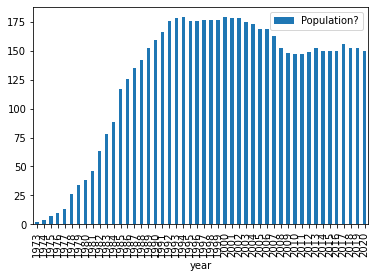

In [33]:
df_final.plot(x='year', y='Population?', kind='bar')

In [ ]:
#averages

In [34]:
df_final['Population?'].mean()

128.35416666666666

In [ ]:
#almost exactly the typical number. Does this have something to do with them being at capacity? 

In [35]:
df_final['Population?'].median()

151.0

# Same name folks

Are these the same people? Just typos/ errors in data entry?

In [112]:
df['Name'] = df['LastName'] + ', '+df['FirstName']

In [116]:
df['Name'].value_counts().head(7)

Yearwood, Reginald    2
Peterson, David R.    2
Peay, Rita            2
Williams, Scott       2
Lukasik, Patricia     2
Rossi, Roger          2
Smith, Jamel          2
Name: Name, dtype: int64

In [118]:
df[df['Name'] == 'Yearwood, Reginald']

LastName FirstName CommitDate DischargeDate Difference  \
392  Yearwood  Reginald 1988-12-06           NaT        NaT   
393  Yearwood  Reginald 1998-12-06           NaT        NaT   

                   Name  
392  Yearwood, Reginald  
393  Yearwood, Reginald

In [120]:
df[df['Name'] == 'Peterson, David R.']

LastName FirstName CommitDate DischargeDate Difference  \
300  Peterson  David R. 1988-05-09           NaT        NaT   
301  Peterson  David R. 1990-05-31           NaT        NaT   

                   Name  
300  Peterson, David R.  
301  Peterson, David R.

In [121]:
df[df['Name'] == 'Peay, Rita']

LastName FirstName CommitDate DischargeDate Difference        Name
292     Peay      Rita 1988-03-21    1993-03-20  1825 days  Peay, Rita
293     Peay      Rita 1986-03-06    1991-12-05  2100 days  Peay, Rita

In [122]:
df[df['Name'] == 'Williams, Scott']

LastName FirstName CommitDate DischargeDate Difference             Name
386  Williams     Scott 1999-12-22    2014-12-21  5478 days  Williams, Scott
387  Williams     Scott 1995-12-18           NaT        NaT  Williams, Scott

In [123]:
df[df['Name'] == 'Lukasik, Patricia']

LastName FirstName CommitDate DischargeDate Difference               Name
213  Lukasik  Patricia 1977-03-03    1987-03-02  3651 days  Lukasik, Patricia
214  Lukasik  Patricia 1980-01-11    1990-01-10  3652 days  Lukasik, Patricia

In [124]:
df[df['Name'] == 'Rossi, Roger']

LastName FirstName CommitDate DischargeDate Difference          Name
321    Rossi     Roger 1994-04-15    2009-10-14  5661 days  Rossi, Roger
322    Rossi     Roger 1987-10-07    2009-10-14  8043 days  Rossi, Roger

In [125]:
df[df['Name'] == 'Smith, Jamel']

LastName FirstName CommitDate DischargeDate Difference          Name
347    Smith     Jamel 2014-11-10           NaT        NaT  Smith, Jamel
349    Smith     Jamel 2017-06-13           NaT        NaT  Smith, Jamel